# Influencia del viendo y precipitaciones en la calidad del aire

Durante la elaboración de este estudio se utilizará la metodología SEMMA (Sample,  Explore,  Modify, Model, Assess),en cada una de las fases se irá explicando los pasos realizados.

Como paso previo al estudio, se realizará la carga de paquetes y librerías necesarias para el mismo.

## Instalamos Paquetes y cargamos librerias

In [1]:
#Limpiamos memoria
rm(list=ls());
is.installed <- function(mypkg) {
  is.element(mypkg, installed.packages()[,1]) 
}

#Instalamos paquetes para agrupar csv
if (!is.installed("data.table")){
  install.packages("data.table",repos = "http://cran.us.r-project.org")
};
#Intslamos paquete para manipular ts
if (!is.installed("xts")){
  install.packages("xts",repos = "http://cran.us.r-project.org")
};
#Instalamos paquete para agrupar datos
if (!is.installed("dplyr")){
  install.packages("dplyr",repos = "http://cran.us.r-project.org")
};
# Instalamos paquete para leer exccels
if (!is.installed("readxl")){
  install.packages("readxl",repos = "http://cran.us.r-project.org")
};
#Instalamos paquetes para modelo predictivo de arbol
if (!is.installed("party")){
  install.packages("party",repos = "http://cran.us.r-project.org")
};
if (!is.installed("rpart")){
  install.packages("rpart",repos = "http://cran.us.r-project.org")
};
if (!is.installed("randomForest")){
  install.packages("randomForest",repos = "http://cran.us.r-project.org")
};
if (!is.installed("rpart.plot")){
  install.packages("rpart.plot",repos = "http://cran.us.r-project.org")
};
if (!is.installed("rattle")){
  install.packages("rattle",repos = "http://cran.us.r-project.org")
};
if (!is.installed("RColorBrewer")){
  install.packages("RColorBrewer",repos = "http://cran.us.r-project.org")
};

In [2]:
# Cargamos las librerias
library(data.table)
library(xts)
library(dplyr)    # loads %>%
library(readxl)
library(ggplot2)
library(party)
library(rpart)
library(randomForest)
library(rpart.plot)
library(rattle)
library(RColorBrewer)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘xts’

The following objects are masked from ‘package:data.table’:

    first, last


Attaching package: ‘dplyr’

The following objects are masked from ‘package:xts’:

    first, last

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: sandwich
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin

The followin

## 1º FASE: Sample

Se toma una muestra de los datos y se crea con ellos un dataset (más) reducido. Las muestras deben ser lo suficientemente grandes como para contener toda la información significativa pero también lo suficientemente pequeñas como para poder procesarlas rápidamente.


### Cargamos datos calidad del aire 2001-2018 Madrid

Cargamos en un dataframe las mediciones de los contaminantes de Madrid entre 2001-2018

In [3]:
#Cargamos los datos de los anos en un dataset (utilziamos read.csv ya que el separador es,)

data2001<- read.csv(file = "data/madrid_2001.csv",header = TRUE);
data2002<- read.csv(file = "data/madrid_2002.csv",header = TRUE);
data2003<- read.csv(file = "data/madrid_2003.csv",header = TRUE);
data2004<- read.csv(file = "data/madrid_2004.csv",header = TRUE);
data2005<- read.csv(file = "data/madrid_2005.csv",header = TRUE);
data2006<- read.csv(file = "data/madrid_2006.csv",header = TRUE);
data2007<- read.csv(file = "data/madrid_2007.csv",header = TRUE);
data2008<- read.csv(file = "data/madrid_2008.csv",header = TRUE);
data2009<- read.csv(file = "data/madrid_2009.csv",header = TRUE);
data2010<- read.csv(file = "data/madrid_2010.csv",header = TRUE);
data2011<- read.csv(file = "data/madrid_2011.csv",header = TRUE);
data2012<- read.csv(file = "data/madrid_2012.csv",header = TRUE);
data2013<- read.csv(file = "data/madrid_2013.csv",header = TRUE);
data2014<- read.csv(file = "data/madrid_2014.csv",header = TRUE);
data2015<- read.csv(file = "data/madrid_2015.csv",header = TRUE);
data2016<- read.csv(file = "data/madrid_2016.csv",header = TRUE);
data2017<- read.csv(file = "data/madrid_2017.csv",header = TRUE);
data2018<- read.csv(file = "data/madrid_2018.csv",header = TRUE);

In [4]:
# unimos los datos 
data <- data.table::rbindlist(list(data2001,data2002,data2003,data2004,data2005,data2006,
                                   data2007,data2008,data2009,data2010,data2011,data2012,
                                   data2013,data2014,data2015,data2016,data2017,data2018),
                                   fill = TRUE);

# convertimos la lista en un dataset
airMadrid <- as.data.frame(data); 

# liberamos memoria
rm(list=ls(pattern="data"))

###  Carga datos Precipitaciones 2001-2018

Cargamos en un dataframe las mediciones de las precipitaciones de Madrid entre 2001-2018

In [5]:
#Cargamos los datos de las precipitaciones
rainfall_2001<- readxl::read_xlsx("data/rainfall_2001.xlsx",col_names = TRUE);
rainfall_2002<- readxl::read_xlsx("data/rainfall_2002.xlsx",col_names = TRUE);
rainfall_2003<- readxl::read_xlsx("data/rainfall_2003.xlsx",col_names = TRUE);
rainfall_2004<- readxl::read_xlsx("data/rainfall_2004.xlsx",col_names = TRUE);
rainfall_2005<- readxl::read_xlsx("data/rainfall_2005.xlsx",col_names = TRUE);
rainfall_2006<- readxl::read_xlsx("data/rainfall_2006.xlsx",col_names = TRUE);
rainfall_2007<- readxl::read_xlsx("data/rainfall_2007.xlsx",col_names = TRUE);
rainfall_2008<- readxl::read_xlsx("data/rainfall_2008.xlsx",col_names = TRUE);
rainfall_2009<- readxl::read_xlsx("data/rainfall_2009.xlsx",col_names = TRUE);
rainfall_2010<- readxl::read_xlsx("data/rainfall_2010.xlsx",col_names = TRUE);
rainfall_2011<- readxl::read_xlsx("data/rainfall_2011.xlsx",col_names = TRUE);
rainfall_2012<- readxl::read_xlsx("data/rainfall_2012.xlsx",col_names = TRUE);
rainfall_2013<- readxl::read_xlsx("data/rainfall_2013.xlsx",col_names = TRUE);
rainfall_2014<- readxl::read_xlsx("data/rainfall_2014.xlsx",col_names = TRUE);
rainfall_2015<- readxl::read_xlsx("data/rainfall_2015.xlsx",col_names = TRUE);
rainfall_2016<- readxl::read_xlsx("data/rainfall_2016.xlsx",col_names = TRUE);
rainfall_2017<- readxl::read_xlsx("data/rainfall_2017.xlsx",col_names = TRUE);
rainfall_2018<- readxl::read_xlsx("data/rainfall_2018.xlsx",col_names = TRUE);

In [6]:
# unimos los datos
rainfall <- data.table::rbindlist(list(rainfall_2001,rainfall_2002,rainfall_2003,rainfall_2004,
              rainfall_2005,rainfall_2006,rainfall_2007,rainfall_2008,rainfall_2009,rainfall_2010,
              rainfall_2011,rainfall_2012,rainfall_2013,rainfall_2014,rainfall_2015,rainfall_2016,
rainfall_2017,rainfall_2018), fill = TRUE)

# convertimos la lista en un dataset
dataFrameRainfall <- as.data.frame(rainfall);

# liberamos memoria
rm(list=ls(pattern="rainfall"))



### Carga datos Viento 2001-2018

Cargamos en un dataframe las mediciones del viento de Madrid entre 2001-2018

In [7]:
#Cargamos los datos de las precipitaciones
wind_2001<- readxl::read_xlsx("data/wind_2001.xlsx",col_names = TRUE);
wind_2002<- readxl::read_xlsx("data/wind_2002.xlsx",col_names = TRUE);
wind_2003<- readxl::read_xlsx("data/wind_2003.xlsx",col_names = TRUE);
wind_2004<- readxl::read_xlsx("data/wind_2004.xlsx",col_names = TRUE);
wind_2005<- readxl::read_xlsx("data/wind_2005.xlsx",col_names = TRUE);
wind_2006<- readxl::read_xlsx("data/wind_2006.xlsx",col_names = TRUE);
wind_2007<- readxl::read_xlsx("data/wind_2007.xlsx",col_names = TRUE);
wind_2008<- readxl::read_xlsx("data/wind_2008.xlsx",col_names = TRUE);
wind_2009<- readxl::read_xlsx("data/wind_2009.xlsx",col_names = TRUE);
wind_2010<- readxl::read_xlsx("data/wind_2010.xlsx",col_names = TRUE);
wind_2011<- readxl::read_xlsx("data/wind_2011.xlsx",col_names = TRUE);
wind_2012<- readxl::read_xlsx("data/wind_2012.xlsx",col_names = TRUE);
wind_2013<- readxl::read_xlsx("data/wind_2013.xlsx",col_names = TRUE);
wind_2014<- readxl::read_xlsx("data/wind_2014.xlsx",col_names = TRUE);
wind_2015<- readxl::read_xlsx("data/wind_2015.xlsx",col_names = TRUE);
wind_2016<- readxl::read_xlsx("data/wind_2016.xlsx",col_names = TRUE);
wind_2017<- readxl::read_xlsx("data/wind_2017.xlsx",col_names = TRUE);
wind_2018<- readxl::read_xlsx("data/wind_2018.xlsx",col_names = TRUE);

In [8]:
wind <- data.table::rbindlist(list(wind_2001,wind_2002,wind_2003,wind_2004,
              wind_2005,wind_2006,wind_2007,wind_2008,wind_2009,wind_2010,
              wind_2011,wind_2012,wind_2013,wind_2014,wind_2015,wind_2016,
wind_2017,wind_2018), fill = TRUE)

dataFrameWind <- as.data.frame(wind);

rm(list=ls(pattern="wind"))

wind <-dataFrameWind
rm(dataFrameWind)

## 2º FASE: Explore

Se analizan (exploran) los datos para comprenderlos, buscando relaciones previstas, tendencias imprevistas y/o anomalías, así como ideas para su posterior procesamiento.

Para cada uno de los dataframe creados se visualizará el principo y el final de los mismas para observar si el intervalo en el que se encuentran abarca 2001-2018

### Visualizacion inicial datos calidad del aire

In [9]:
head(airMadrid)

date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
2001-08-01 01:00:00,NA,0.37,NA,NA,NA,58.40,87.15,NA,34.53,105.00,NA,6.34,NA,NA,28079001,NA,NA,NA
2001-08-01 01:00:00,1.50,0.34,1.49,4.10,0.07,56.25,75.17,2.11,42.16,100.60,1.73,8.11,1.24,10.82,28079035,NA,NA,NA
2001-08-01 01:00:00,NA,0.28,NA,NA,NA,50.66,61.38,NA,46.31,100.10,NA,7.85,NA,NA,28079003,NA,NA,NA
2001-08-01 01:00:00,NA,0.47,NA,NA,NA,69.79,73.45,NA,40.65,69.78,NA,6.46,NA,NA,28079004,NA,NA,NA
2001-08-01 01:00:00,NA,0.39,NA,NA,NA,22.83,24.80,NA,66.31,75.18,NA,8.80,NA,NA,28079039,NA,NA,NA
2001-08-01 01:00:00,2.11,0.63,2.48,5.94,0.05,66.26,118.10,3.15,33.50,122.70,2.29,6.36,1.23,13.28,28079006,NA,NA,NA


In [10]:
tail(airMadrid)

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
3808219,2018-02-01 00:00:00,1.3,NA,1.2,NA,0.13,94,190,NA,NA,35,NA,NA,1.68,5.2,28079055,NA,63,1.55
3808220,2018-02-01 00:00:00,NA,0.5,NA,NA,NA,91,192,NA,1,35,NA,NA,NA,NA,28079056,22,66,NA
3808221,2018-02-01 00:00:00,NA,0.7,NA,NA,NA,107,241,NA,NA,29,NA,15,NA,NA,28079057,NA,87,NA
3808222,2018-02-01 00:00:00,NA,NA,NA,NA,NA,48,91,NA,2,NA,NA,NA,NA,NA,28079058,NA,28,NA
3808223,2018-02-01 00:00:00,NA,NA,NA,NA,NA,103,320,NA,2,NA,NA,NA,NA,NA,28079059,NA,141,NA
3808224,2018-02-01 00:00:00,NA,NA,NA,NA,NA,96,202,NA,3,26,NA,NA,NA,NA,28079060,NA,69,NA


### Visualizacion inicial datos precipitaciones

In [11]:
head(dataFrameRainfall)

FECHA,Precipitación: l/m2
2001-01-01,4.3
2001-01-02,0.1
2001-01-03,2.2
2001-01-04,2.4
2001-01-05,13.3
2001-01-06,0.0


In [12]:
tail(dataFrameRainfall)

,FECHA,Precipitación: l/m2
5933,2018-12-26,0
5934,2018-12-27,0
5935,2018-12-28,0
5936,2018-12-29,0
5937,2018-12-30,0
5938,2018-12-31,0


## Visualizacion inicial datos viento

In [13]:
head(wind)

FECHA,Racha Max (Km/h),Hora Racha,Veloc. Media (Km/h)
2001-01-01,43.92,0.94444444444444453,3.96
2001-01-02,52.92,0.60416666666666663,12.96
2001-01-03,33.84,0.65277777777777779,6.12
2001-01-04,41.04,0.54861111111111105,11.88
2001-01-05,46.08,0.99305555555555547,3.96
2001-01-06,41.04,0.47222222222222227,9


In [14]:
tail(wind)

,FECHA,Racha Max (Km/h),Hora Racha,Veloc. Media (Km/h)
5854,2018-12-26,10.08,Varias,2.16
5855,2018-12-27,10.08,0.49305555555555558,2.16
5856,2018-12-28,25.92,0.90277777777777779,5.04
5857,2018-12-29,30.96,0.96527777777777779,6.12
5858,2018-12-30,32.04,1.3888888888888888E-2,3.96
5859,2018-12-31,11.16,0.55555555555555558,1.08


## 3º FASE: Modify

Se modifican los datos (creando, seleccionando y transformando las variables adecuadas) para facilitar el proceso siguiente (modelización).


### Modificaciones dataframe precipitaciones

Se cambiarán los nombres de las columnas para una mejor utilización de las mismas. También se modificará el tipo de la columna "*Precipitación: l/m2*" a númerico pra poder tartar los datos 

In [15]:
# cambiamos nombre de las columnas
data.table::setnames(dataFrameRainfall, "FECHA", "date")
data.table::setnames(dataFrameRainfall, "Precipitación: l/m2", "quantity")
#Convertimos tipos
dataFrameRainfall <- as.data.frame(dataFrameRainfall)
dataFrameRainfall$quantity <- as.numeric(dataFrameRainfall$quantity)

### Modificaciones dataframe viento

Se cambiarán los nombres de las columnas para una mejor utilización de las mismas. Se eliminarán las columnas que no se utilizarán en el estudio y oor eltipo se comprobará el tipo de las columnas restantes, transformando la velocidad del viento a m/s para su posterior discretización

In [16]:
# cambiamos nombre de las columnas
data.table::setnames(wind, "FECHA", "date")
data.table::setnames(wind, "Veloc. Media (Km/h)", "Speed")
data.table::setnames(wind, "Racha Max (Km/h)", "maxSpeed")
data.table::setnames(wind, "Hora Racha", "time")

#Eliminamos columnas que no nos interesan
wind$time = NULL
wind$maxSpeed= NULL

#Preparamos la fecha en formato Date para cruzar los datos
wind$date <- as.Date(wind$date)

#Ponemos la velocidad del viento en m/s

wind$Speed <- as.numeric(wind$Speed)
wind$Speed = wind$Speed * (1000/3600)


### Limpieza de datos

Tras las modificaciones en los dataset anteriores procedemos a sustitutir los NaN como NA para que puedan ser utilizados en el estudio.Se realizará esta operacion en los dataframes:
- Muestras contaminación Madrid
- Precipitaciones
- Viento

In [17]:
is.nan.data.frame <- function(x)
    do.call(cbind,lapply(x,is.nan))
airMadrid <- as.data.frame(airMadrid)
airMadrid[is.nan(airMadrid)] <- NA
tail(airMadrid)

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
3808219,2018-02-01 00:00:00,1.3,NA,1.2,NA,0.13,94,190,NA,NA,35,NA,NA,1.68,5.2,28079055,NA,63,1.55
3808220,2018-02-01 00:00:00,NA,0.5,NA,NA,NA,91,192,NA,1,35,NA,NA,NA,NA,28079056,22,66,NA
3808221,2018-02-01 00:00:00,NA,0.7,NA,NA,NA,107,241,NA,NA,29,NA,15,NA,NA,28079057,NA,87,NA
3808222,2018-02-01 00:00:00,NA,NA,NA,NA,NA,48,91,NA,2,NA,NA,NA,NA,NA,28079058,NA,28,NA
3808223,2018-02-01 00:00:00,NA,NA,NA,NA,NA,103,320,NA,2,NA,NA,NA,NA,NA,28079059,NA,141,NA
3808224,2018-02-01 00:00:00,NA,NA,NA,NA,NA,96,202,NA,3,26,NA,NA,NA,NA,28079060,NA,69,NA


In [18]:
is.nan.data.frame <- function(x)
    do.call(cbind,lapply(x,is.nan))
dataFrameRainfall <- as.data.frame(dataFrameRainfall)
dataFrameRainfall[is.nan(dataFrameRainfall)] <- NA
tail(dataFrameRainfall)

,date,quantity
5933,2018-12-26,0
5934,2018-12-27,0
5935,2018-12-28,0
5936,2018-12-29,0
5937,2018-12-30,0
5938,2018-12-31,0


In [19]:
is.nan.data.frame <- function(x)
    do.call(cbind,lapply(x,is.nan))
wind <- as.data.frame(wind)
wind[is.nan(wind)] <- NA
tail(wind)

,date,Speed
5854,2018-12-26,0.6
5855,2018-12-27,0.6
5856,2018-12-28,1.4
5857,2018-12-29,1.7
5858,2018-12-30,1.1
5859,2018-12-31,0.3


A continuación se elimnarán del dafarme de contaminación aquellos gases de los cuales se tenga poco datos, para ello se estblecerá la línea de corte en 35%.

In [20]:
#1) Calculamos el porcenje de NA para descartar aquellas columnas cuyo porcentage sea muy alto
naPerColumn <- colSums(is.na(airMadrid))

#2) Todos los gases tienen al menos un NA por , tanto, estudiamos gases a descartar, para ello
#quitamos los demás parámetros
percentageNA <- round(naPerColumn/nrow(airMadrid) *100, digits = 2)
percentageNA <- percentageNA[percentageNA > 0]
percentageNA <- percentageNA[order(percentageNA)]
percentageNA

NO_2   O_3  PM10  SO_2    CO   NOx    NO   TCH  NMHC   BEN   TOL   EBE  PM25 
 0.56 21.44 24.87 27.11 30.39 37.60 59.76 71.47 71.50 72.65 72.72 73.70 78.56 
  OXY   PXY   MXY   CH4 
91.71 91.71 91.72 99.61

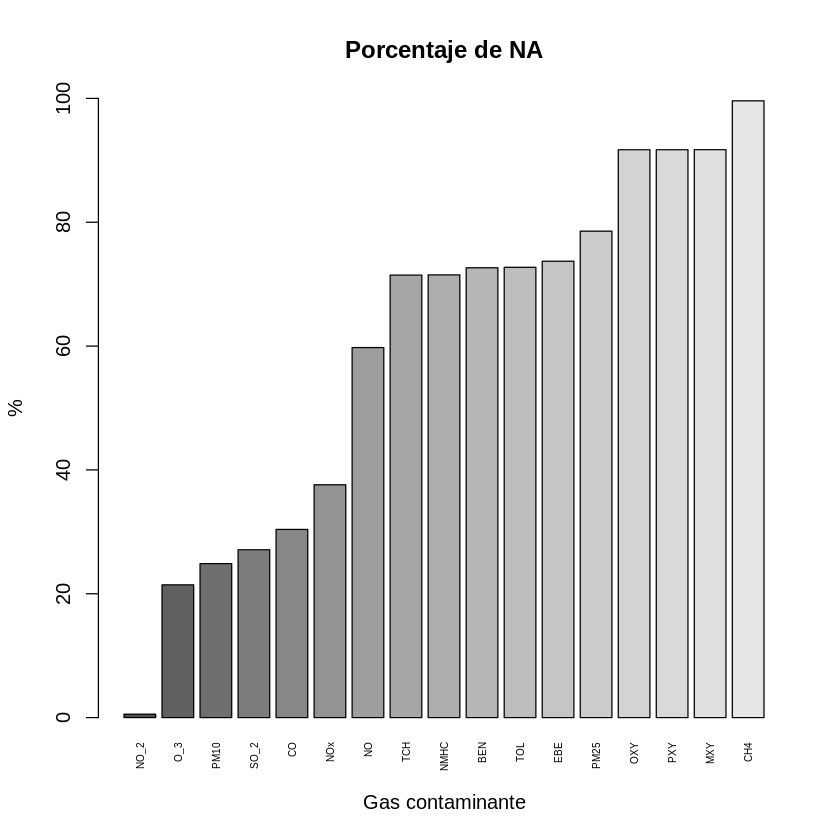

In [21]:
#2)Pintamos grafica de barras para observar volumen NA en los gases contaminantes
barplot(percentageNA, main ="Porcentaje de NA",xlab = "Gas contaminante",ylab = "%",
        ylim = c(0,100), las=3, cex.names=.5, col = gray.colors(17))

In [22]:
#Nos quedamos con aquellos gases que tengan menos del 35% de NA
percentageNA[percentageNA < 35]

NO_2   O_3  PM10  SO_2    CO 
 0,56 21,44 24,87 27,11 30,39

In [23]:
#Procedemos a quitar el resto de columnas
airMadrid$BEN = NULL;
airMadrid$EBE = NULL;
airMadrid$MXY = NULL;
airMadrid$NMHC = NULL;
airMadrid$NOx = NULL;
airMadrid$OXY = NULL;
airMadrid$PXY = NULL;
airMadrid$TCH = NULL;
airMadrid$TOL = NULL;
airMadrid$PM25 = NULL;
airMadrid$NO = NULL;
airMadrid$CH4 = NULL;

#Mostramos dataframe para observar cambios
head(airMadrid)
tail(airMadrid)

date,CO,NO_2,O_3,PM10,SO_2,station
2001-08-01 01:00:00,"0,37","58,40","34,53","105,00","6,34",28079001
2001-08-01 01:00:00,"0,34","56,25","42,16","100,60","8,11",28079035
2001-08-01 01:00:00,"0,28","50,66","46,31","100,10","7,85",28079003
2001-08-01 01:00:00,"0,47","69,79","40,65","69,78","6,46",28079004
2001-08-01 01:00:00,"0,39","22,83","66,31","75,18","8,80",28079039
2001-08-01 01:00:00,"0,63","66,26","33,50","122,70","6,36",28079006


,date,CO,NO_2,O_3,PM10,SO_2,station
3808219,2018-02-01 00:00:00,NA,94,NA,35,NA,28079055
3808220,2018-02-01 00:00:00,"0,5",91,1,35,NA,28079056
3808221,2018-02-01 00:00:00,"0,7",107,NA,29,15,28079057
3808222,2018-02-01 00:00:00,NA,48,2,NA,NA,28079058
3808223,2018-02-01 00:00:00,NA,103,2,NA,NA,28079059
3808224,2018-02-01 00:00:00,NA,96,3,26,NA,28079060


In [24]:
# Liberamos memoria
rm(percentageNA)
rm(naPerColumn)

### Agrupacion de datos

Dado que las muestras de la contaminación son por hora, se agruparan las mismas realizando la media de cada uno de los gases diaria.
- 1) Mostrar dataframe ordenado por estación
- 2) Cambiar el formato de la fecha para poder agrupar esta columna
- 3) Agrupar por fecha y mostrar resultado

#### Mostrar dataframe ordenado por estación

In [25]:
airMadrid<- airMadrid[order(airMadrid$station),]
head(airMadrid, n=24)
tail(airMadrid)

,date,CO,NO_2,O_3,PM10,SO_2,station
1,2001-08-01 01:00:00,"0,37","58,40","34,53","105,00","6,34",28079001
25,2001-08-01 02:00:00,"0,42","65,76","27,93","69,75","7,15",28079001
49,2001-08-01 03:00:00,"0,32","61,09","32,07","56,22","6,26",28079001
73,2001-08-01 04:00:00,"0,23","47,02","42,21","50,69","5,19",28079001
97,2001-08-01 05:00:00,"0,19","47,17","48,46","49,49","5,03",28079001
121,2001-08-01 06:00:00,"0,06","63,83","40,80","43,47","5,24",28079001
145,2001-08-01 07:00:00,"0,28","91,74","22,18","42,19","7,37",28079001
169,2001-08-01 08:00:00,"0,89","127,80","11,98","45,72","11,37",28079001
193,2001-08-01 09:00:00,"1,51","129,50","9,71","68,46","15,57",28079001
217,2001-08-01 10:00:00,"1,80","127,70","8,86","91,84","19,47",28079001


,date,CO,NO_2,O_3,PM10,SO_2,station
2268754,2010-07-31 19:00:00,"0,22","17,83","120,20","20,17","6,93",28079099
2268776,2010-07-31 20:00:00,"0,23","22,57","112,70","13,95","6,88",28079099
2268798,2010-07-31 21:00:00,"0,27","33,91","98,27","22,44","6,84",28079099
2268820,2010-07-31 22:00:00,"0,38","64,05","69,79","52,17","6,97",28079099
2268842,2010-07-31 23:00:00,"0,50","86,81","49,55","54,36","7,12",28079099
2268864,2010-08-01 00:00:00,"0,43","76,33","52,26","47,15","7,03",28079099


#### Cambiar el formato de la fecha para poder agrupar esta columna

In [26]:
airMadrid$date <- as.Date(airMadrid$date, format = "%Y-%m-%d")

In [27]:
head(airMadrid, n = 24)
tail(airMadrid)

,date,CO,NO_2,O_3,PM10,SO_2,station
1,2001-08-01,"0,37","58,40","34,53","105,00","6,34",28079001
25,2001-08-01,"0,42","65,76","27,93","69,75","7,15",28079001
49,2001-08-01,"0,32","61,09","32,07","56,22","6,26",28079001
73,2001-08-01,"0,23","47,02","42,21","50,69","5,19",28079001
97,2001-08-01,"0,19","47,17","48,46","49,49","5,03",28079001
121,2001-08-01,"0,06","63,83","40,80","43,47","5,24",28079001
145,2001-08-01,"0,28","91,74","22,18","42,19","7,37",28079001
169,2001-08-01,"0,89","127,80","11,98","45,72","11,37",28079001
193,2001-08-01,"1,51","129,50","9,71","68,46","15,57",28079001
217,2001-08-01,"1,80","127,70","8,86","91,84","19,47",28079001


,date,CO,NO_2,O_3,PM10,SO_2,station
2268754,2010-07-31,"0,22","17,83","120,20","20,17","6,93",28079099
2268776,2010-07-31,"0,23","22,57","112,70","13,95","6,88",28079099
2268798,2010-07-31,"0,27","33,91","98,27","22,44","6,84",28079099
2268820,2010-07-31,"0,38","64,05","69,79","52,17","6,97",28079099
2268842,2010-07-31,"0,50","86,81","49,55","54,36","7,12",28079099
2268864,2010-08-01,"0,43","76,33","52,26","47,15","7,03",28079099


#### Agrupar por fecha y mostrar resultado

In [28]:
madrid <- airMadrid %>%
  group_by(station,date) %>%
  summarise(CO = mean(CO, na.rm = TRUE),
            NO_2 = mean(NO_2, na.rm = TRUE),
            O_3 = mean(O_3, na.rm = TRUE),
            PM10 = mean(PM10, na.rm = TRUE),
            SO_2 = mean(SO_2, na.rm = TRUE))
head(madrid)
tail(madrid)
rm(airMadrid)

station,date,CO,NO_2,O_3,PM10,SO_2
28079001,2001-01-02,"1,243333","84,53750","12,576667","36,92455","20,28083"
28079001,2001-01-03,"1,242917","79,75125","10,961250","37,21292","16,23917"
28079001,2001-01-04,"1,134167","75,39250","12,002917","35,03667","16,75125"
28079001,2001-01-05,"1,535833","77,14083","8,755833","34,27625","16,00958"
28079001,2001-01-06,"1,009167","64,47708","13,955417","17,03792","15,35417"
28079001,2001-01-07,"1,016250","67,06125","12,776250","20,45500","18,43042"


station,date,CO,NO_2,O_3,PM10,SO_2
28079099,2010-12-27,"0,6770833","83,11375","7,620417","31,41708","15,32375"
28079099,2010-12-28,"0,7100000","86,31750","7,642500","35,74667","18,47833"
28079099,2010-12-29,"0,7404167","82,27375","9,689583","31,68542","18,05083"
28079099,2010-12-30,"0,6145833","68,60792","7,415417","25,95917","13,35000"
28079099,2010-12-31,"0,4387500","55,20375","14,215417","14,84542","10,28958"
28079099,2011-01-01,"0,4800000","53,53000","6,850000","19,45000","11,71000"


Observamos que la estacion *28079099* no tiene muestras desde 2011, se debe a que fue dada de baja ese año por lo que se procede a eliminar del estudio. A continuación mostramos el final del data.frame para observar que ya no se encuentra dicha estación.

In [29]:
madrid <-  madrid[!madrid$station == 28079099,]
madrid[is.na(madrid)] <- 0 # convertir los NAS a ceros para que pinte bien la grafica
tail(madrid)

station,date,CO,NO_2,O_3,PM10,SO_2
28079060,2018-04-26,0,"29,041667","77,25000","42,54167",0
28079060,2018-04-27,0,"20,958333","81,83333","29,57143",0
28079060,2018-04-28,0,"8,375000","87,20833","10,33333",0
28079060,2018-04-29,0,"6,958333","93,08333","14,45833",0
28079060,2018-04-30,0,"13,708333","83,33333","12,91667",0
28079060,2018-05-01,0,"14,000000","81,00000","6,00000",0


### Agregacion de todos los gases contaminantes

In [30]:
madrid_ts <- rowSums(madrid[,3:7], na.rm=TRUE)
head(madrid)

station,date,CO,NO_2,O_3,PM10,SO_2
28079001,2001-01-02,"1,243333","84,53750","12,576667","36,92455","20,28083"
28079001,2001-01-03,"1,242917","79,75125","10,961250","37,21292","16,23917"
28079001,2001-01-04,"1,134167","75,39250","12,002917","35,03667","16,75125"
28079001,2001-01-05,"1,535833","77,14083","8,755833","34,27625","16,00958"
28079001,2001-01-06,"1,009167","64,47708","13,955417","17,03792","15,35417"
28079001,2001-01-07,"1,016250","67,06125","12,776250","20,45500","18,43042"


In [31]:
madrid_ts <- ts(madrid_ts, start=c(2001, 1), end=c(2018, 1), frequency=365)

In [32]:
dataFrameRainfall$date <- as.Date(dataFrameRainfall$date)
rainfall<-dataFrameRainfall
rm(dataFrameRainfall)
rainfall[is.na(rainfall)] <- 0 # convertir los NAS a ceros para que pinte bien la grafica
head(rainfall, n = 10)

date,quantity
2001-01-01,"4,3"
2001-01-02,"0,1"
2001-01-03,"2,2"
2001-01-04,"2,4"
2001-01-05,"13,3"
2001-01-06,"0,0"
2001-01-07,"0,0"
2001-01-08,"0,0"
2001-01-09,"1,5"
2001-01-10,"9,8"


### Graficas con la evolucion de la contaminacion y las precipitaciones a lo largo del tiempo

In [33]:
rainfall_ts <- ts(rainfall$quantity, start=c(2001, 1), end=c(2018, 1), frequency=365)

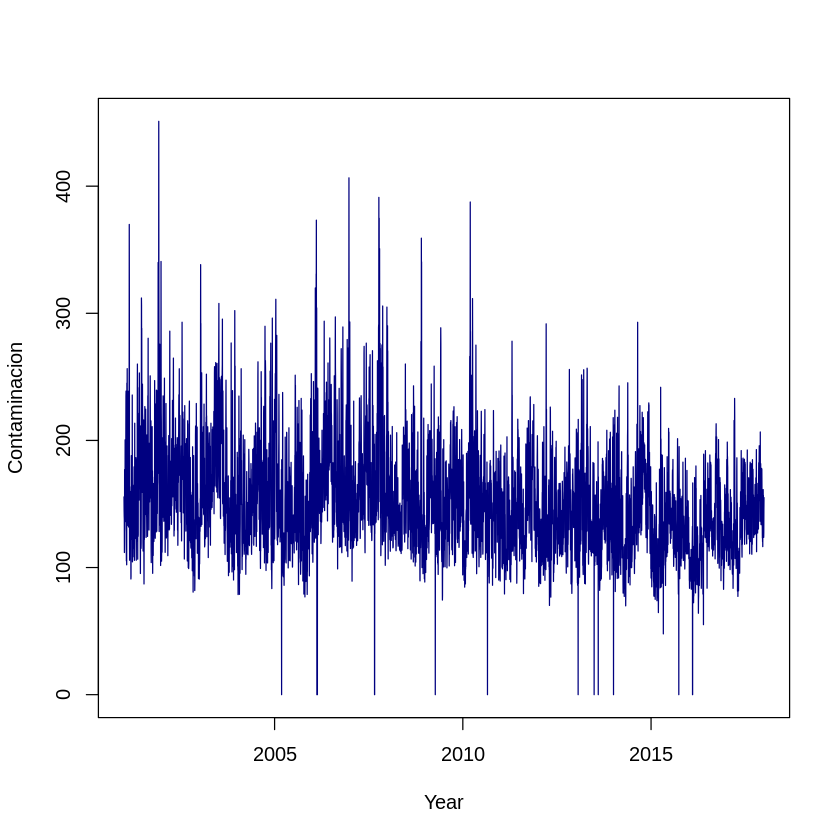

In [34]:
plot(madrid_ts, xlab="Year", ylab="Contaminacion",
       col="navy")


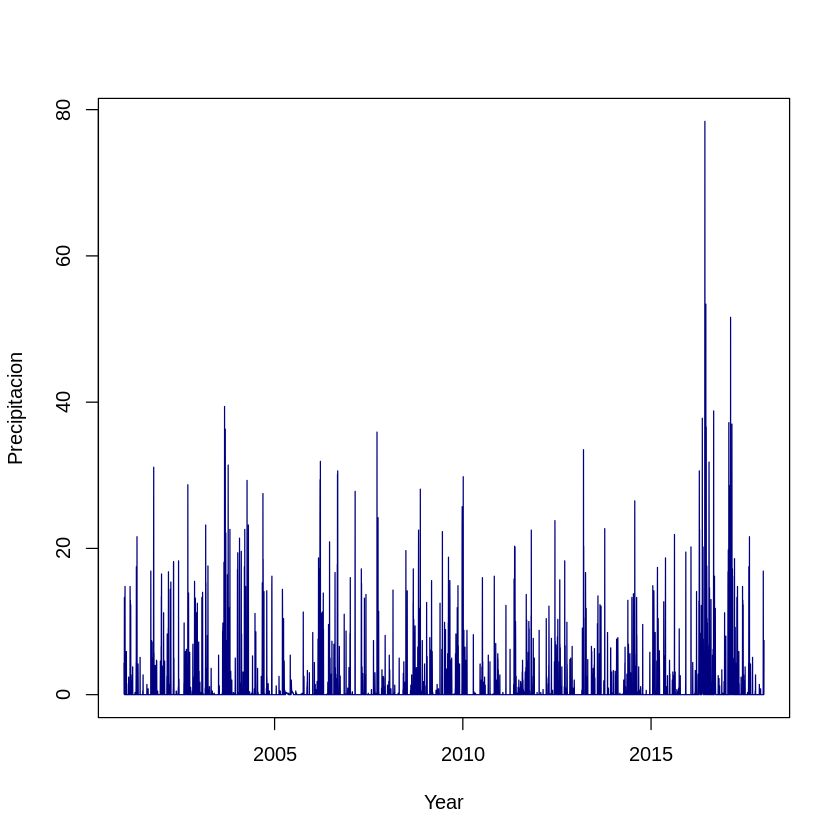

In [35]:
plot(rainfall_ts, xlab="Year", ylab="Precipitacion",
       col="navy")

### Preparación para el modelo (Discretización de variables)

Tras los pasos anteriores se procederá a realizar la discretización de las variables dependientes que formarán parte del modelo para preparar el dataframe para el modelo

#### Discretizamos la calidad del aire
Para ello nos guiraremos de la siguiente tabla, de cada fila se escogerá el mayor de todos los contaminantes y se comparara con la tabla adjunta:

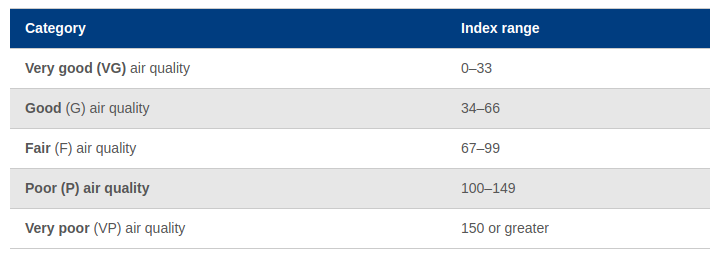

Fuente: https://www.epa.vic.gov.au/your-environment/air/air-pollution/air-quality-index/calculating-a-station-air-quality-index

Para ello cogemos el maximo valor de cada fila entre los gases y lo añadimos como una columna nueva al data frame

In [36]:
auxData <- madrid
auxData$date=NULL
auxData$station = NULL
auxData[, "worseAirIndex"] <- apply(auxData ,1, max)
auxData$CO=NULL
auxData$NO_2 = NULL
auxData$O_3 = NULL
auxData$PM10 = NULL
auxData$SO_2 = NULL
madrid <- cbind(madrid,auxData)
head(madrid)

station,date,CO,NO_2,O_3,PM10,SO_2,worseAirIndex
28079001,2001-01-02,"1,243333","84,53750","12,576667","36,92455","20,28083","84,53750"
28079001,2001-01-03,"1,242917","79,75125","10,961250","37,21292","16,23917","79,75125"
28079001,2001-01-04,"1,134167","75,39250","12,002917","35,03667","16,75125","75,39250"
28079001,2001-01-05,"1,535833","77,14083","8,755833","34,27625","16,00958","77,14083"
28079001,2001-01-06,"1,009167","64,47708","13,955417","17,03792","15,35417","64,47708"
28079001,2001-01-07,"1,016250","67,06125","12,776250","20,45500","18,43042","67,06125"


A continuación discretizamos la columna anterior, creando una nueva columna con los siguientes valores:

    Very good(VG)  
    Good (G)  
    Fair(F)  
    Poor (P)  
    Very Poor (VP)  

In [37]:
madrid[,"AirIndexQuality"] <- madrid$worseAirIndex
head(madrid)

station,date,CO,NO_2,O_3,PM10,SO_2,worseAirIndex,AirIndexQuality
28079001,2001-01-02,"1,243333","84,53750","12,576667","36,92455","20,28083","84,53750","84,53750"
28079001,2001-01-03,"1,242917","79,75125","10,961250","37,21292","16,23917","79,75125","79,75125"
28079001,2001-01-04,"1,134167","75,39250","12,002917","35,03667","16,75125","75,39250","75,39250"
28079001,2001-01-05,"1,535833","77,14083","8,755833","34,27625","16,00958","77,14083","77,14083"
28079001,2001-01-06,"1,009167","64,47708","13,955417","17,03792","15,35417","64,47708","64,47708"
28079001,2001-01-07,"1,016250","67,06125","12,776250","20,45500","18,43042","67,06125","67,06125"


In [38]:
madrid <- madrid %>%
        mutate(AirIndexQuality = case_when (
        
        AirIndexQuality>=0 & AirIndexQuality <=33       ~"VERY GOOD",
        AirIndexQuality >=34 & AirIndexQuality <=66     ~"GOOD",
        AirIndexQuality >=37 & AirIndexQuality <=99     ~"FAIR",
        AirIndexQuality >=100 & AirIndexQuality <=149   ~"POOR",
        AirIndexQuality >=150                           ~"VERY POOR",
        TRUE                                            ~"NA",
        ))

    
head(madrid)

station,date,CO,NO_2,O_3,PM10,SO_2,worseAirIndex,AirIndexQuality
28079001,2001-01-02,"1,243333","84,53750","12,576667","36,92455","20,28083","84,53750",FAIR
28079001,2001-01-03,"1,242917","79,75125","10,961250","37,21292","16,23917","79,75125",FAIR
28079001,2001-01-04,"1,134167","75,39250","12,002917","35,03667","16,75125","75,39250",FAIR
28079001,2001-01-05,"1,535833","77,14083","8,755833","34,27625","16,00958","77,14083",FAIR
28079001,2001-01-06,"1,009167","64,47708","13,955417","17,03792","15,35417","64,47708",GOOD
28079001,2001-01-07,"1,016250","67,06125","12,776250","20,45500","18,43042","67,06125",FAIR


In [39]:
madrid[,"AIQNextDay"] <- NA
head(madrid)

station,date,CO,NO_2,O_3,PM10,SO_2,worseAirIndex,AirIndexQuality,AIQNextDay
28079001,2001-01-02,"1,243333","84,53750","12,576667","36,92455","20,28083","84,53750",FAIR,NA
28079001,2001-01-03,"1,242917","79,75125","10,961250","37,21292","16,23917","79,75125",FAIR,NA
28079001,2001-01-04,"1,134167","75,39250","12,002917","35,03667","16,75125","75,39250",FAIR,NA
28079001,2001-01-05,"1,535833","77,14083","8,755833","34,27625","16,00958","77,14083",FAIR,NA
28079001,2001-01-06,"1,009167","64,47708","13,955417","17,03792","15,35417","64,47708",GOOD,NA
28079001,2001-01-07,"1,016250","67,06125","12,776250","20,45500","18,43042","67,06125",FAIR,NA


In [40]:
#Falta alñadir la restricionde que cuando ponemos la del dia suigiente, al tener varias estaciones cuando una estacion no coincide con la anterior ignorarlo
for(i in 2:nrow(madrid)-1) {
  #if(madrid[i-1,"station"] == madrid[i,"station"]){
      madrid[i,"AIQNextDay"] = madrid[i+1,"AirIndexQuality"]
  #}
}
head(madrid)

station,date,CO,NO_2,O_3,PM10,SO_2,worseAirIndex,AirIndexQuality,AIQNextDay
28079001,2001-01-02,"1,243333","84,53750","12,576667","36,92455","20,28083","84,53750",FAIR,FAIR
28079001,2001-01-03,"1,242917","79,75125","10,961250","37,21292","16,23917","79,75125",FAIR,FAIR
28079001,2001-01-04,"1,134167","75,39250","12,002917","35,03667","16,75125","75,39250",FAIR,FAIR
28079001,2001-01-05,"1,535833","77,14083","8,755833","34,27625","16,00958","77,14083",FAIR,GOOD
28079001,2001-01-06,"1,009167","64,47708","13,955417","17,03792","15,35417","64,47708",GOOD,FAIR
28079001,2001-01-07,"1,016250","67,06125","12,776250","20,45500","18,43042","67,06125",FAIR,FAIR


#### Discretizamos el volumen de precipitaciones

Para ello nos guiraremos de la siguiente tabla, de cada fila se escogerá la cantidad y se comparara con la tabla adjunta:

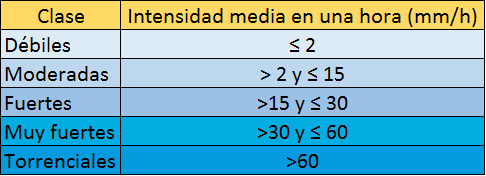

In [41]:
rainfall[,"rainfallVolume"] <- rainfall$quantity
head(rainfall)

date,quantity,rainfallVolume
2001-01-01,"4,3","4,3"
2001-01-02,"0,1","0,1"
2001-01-03,"2,2","2,2"
2001-01-04,"2,4","2,4"
2001-01-05,"13,3","13,3"
2001-01-06,"0,0","0,0"


In [42]:
rainfall <- rainfall %>%
        mutate(rainfallVolume = case_when (
             
        rainfall$rainfallVolume <= 2                                      ~ "WEAK",
        rainfall$rainfallVolume > 2 & rainfall$rainfallVolume <= 15       ~ "MODERATE",
        rainfall$rainfallVolume > 15 & rainfall$rainfallVolume <= 30      ~ "STRONG",
        rainfall$rainfallVolume > 30 & rainfall$rainfallVolume <=60       ~ "VERY STRONG",
        rainfall$rainfallVolume > 60                                      ~ "TORRENTIAL RAIN",
        TRUE                                                              ~"NA",
        ))
head(rainfall)
tail(rainfall)

date,quantity,rainfallVolume
2001-01-01,"4,3",MODERATE
2001-01-02,"0,1",WEAK
2001-01-03,"2,2",MODERATE
2001-01-04,"2,4",MODERATE
2001-01-05,"13,3",MODERATE
2001-01-06,"0,0",WEAK


,date,quantity,rainfallVolume
5933,2018-12-26,0,WEAK
5934,2018-12-27,0,WEAK
5935,2018-12-28,0,WEAK
5936,2018-12-29,0,WEAK
5937,2018-12-30,0,WEAK
5938,2018-12-31,0,WEAK


#### Discretizamos la fuerza del viento

Para ello nos guiraremos de la siguiente tabla, de cada fila se escogerá el viento y se comparara con la tabla adjunta:

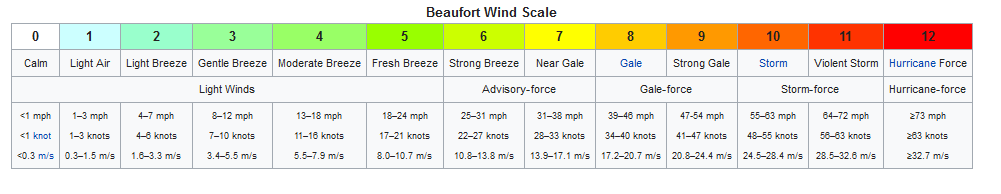

A continuación discretizamos la columna anterior, creando una nueva columna con los siguientes valores:

    LIGTH WIND (LW) 
    ADVISORY FORCE (AF)
    GALE FORCE (GF)
    STORM FORCE (SF)
    HURRICANE FORCE (HF)

In [43]:
wind[,"WindIndexQuality"] <- wind$Speed
wind <- wind %>%
        mutate(WindIndexQuality = case_when (
        
        WindIndexQuality >=0.0 & WindIndexQuality  <=10.7       ~"LIGHT WIND",
        WindIndexQuality >=10.8 & WindIndexQuality <=17.1       ~"ADVISORY FORCE",
        WindIndexQuality >=17.2 & WindIndexQuality <=24.4       ~"GALE FORCE",
        WindIndexQuality >=24.5 & WindIndexQuality <=32.6       ~"STORM FORCE",
        WindIndexQuality >=32.7                                 ~"HURRICANE FORCE",
        TRUE                                                    ~"NA",
        ))
head(wind)
tail(wind)

date,Speed,WindIndexQuality
2001-01-01,"1,1",LIGHT WIND
2001-01-02,"3,6",LIGHT WIND
2001-01-03,"1,7",LIGHT WIND
2001-01-04,"3,3",LIGHT WIND
2001-01-05,"1,1",LIGHT WIND
2001-01-06,"2,5",LIGHT WIND


,date,Speed,WindIndexQuality
5854,2018-12-26,"0,6",LIGHT WIND
5855,2018-12-27,"0,6",LIGHT WIND
5856,2018-12-28,"1,4",LIGHT WIND
5857,2018-12-29,"1,7",LIGHT WIND
5858,2018-12-30,"1,1",LIGHT WIND
5859,2018-12-31,"0,3",LIGHT WIND


#### Cruzamos los datos

Finalmente como último paso previo a la aplicación del modelo se uniraron todos lod datos en un único dataframe

In [44]:
# Cruzamos los datos de las precipitaciones y la contaminacion por fecha 
data <- merge ( x = madrid, y = rainfall, by = "date")
head(data)

date,station,CO,NO_2,O_3,PM10,SO_2,worseAirIndex,AirIndexQuality,AIQNextDay,quantity,rainfallVolume
2001-01-01,28079004,"0,8095652","57,81739","18,35783","17,19826","16,983044","57,81739",GOOD,GOOD,"4,3",MODERATE
2001-01-01,28079014,"1,2600000","44,12000","31,82913","18,61261","8,009565","44,12000",GOOD,GOOD,"4,3",MODERATE
2001-01-01,28079017,"1,0052174","46,15174","22,47435","17,39130","12,387826","46,15174",GOOD,GOOD,"4,3",MODERATE
2001-01-01,28079012,"1,5647826","49,00783","10,75478","23,59696","35,703043","49,00783",GOOD,GOOD,"4,3",MODERATE
2001-01-01,28079003,"0,6500000","44,35609","24,89174","20,22304","22,549130","44,35609",GOOD,GOOD,"4,3",MODERATE
2001-01-01,28079024,"0,7260870","31,98130","23,72609","15,10261","10,258261","31,98130",VERY GOOD,GOOD,"4,3",MODERATE


In [45]:
# Cruzamos los datos con el viento
data <- merge ( x = data, y = wind, by = "date",)
data <- data[order(data$station),]
head(data)

,date,station,CO,NO_2,O_3,PM10,SO_2,worseAirIndex,AirIndexQuality,AIQNextDay,quantity,rainfallVolume,Speed,WindIndexQuality
42,2001-01-02,28079001,"1,243333","84,53750","12,576667","36,92455","20,28083","84,53750",FAIR,FAIR,"0,1",WEAK,"3,6",LIGHT WIND
57,2001-01-03,28079001,"1,242917","79,75125","10,961250","37,21292","16,23917","79,75125",FAIR,FAIR,"2,2",MODERATE,"1,7",LIGHT WIND
84,2001-01-04,28079001,"1,134167","75,39250","12,002917","35,03667","16,75125","75,39250",FAIR,FAIR,"2,4",MODERATE,"3,3",LIGHT WIND
105,2001-01-05,28079001,"1,535833","77,14083","8,755833","34,27625","16,00958","77,14083",FAIR,GOOD,"13,3",MODERATE,"1,1",LIGHT WIND
139,2001-01-06,28079001,"1,009167","64,47708","13,955417","17,03792","15,35417","64,47708",GOOD,FAIR,"0,0",WEAK,"2,5",LIGHT WIND
158,2001-01-07,28079001,"1,016250","67,06125","12,776250","20,45500","18,43042","67,06125",FAIR,FAIR,"0,0",WEAK,"2,2",LIGHT WIND


## 4º FASE: MODEL

Se entrenan y aplican distintos modelos para el procesamiento de los datos, seleccionando aquel cuya tecnología y/o parámetros produce unos resultados aparentemente más adecuados.

### Árbol de decisiones

EL primer modeo a probar será un árbol de decisión, por ello se han discretizado previamente todas las variables dependientes del estudio

Inicializamos el gestor de memoria

In [46]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2034044,"108,7",4100767,"219,1",4100767,"219,1"
Vcells,7462021,"57,0",137146404,"1046,4",214253515,"1634,7"


In [47]:
# Establece una semilla fija para garantizar
# la reproducibilidad del ejemplo

head(data)
tail(data)
str(data)
set.seed(1234)

,date,station,CO,NO_2,O_3,PM10,SO_2,worseAirIndex,AirIndexQuality,AIQNextDay,quantity,rainfallVolume,Speed,WindIndexQuality
42,2001-01-02,28079001,"1,243333","84,53750","12,576667","36,92455","20,28083","84,53750",FAIR,FAIR,"0,1",WEAK,"3,6",LIGHT WIND
57,2001-01-03,28079001,"1,242917","79,75125","10,961250","37,21292","16,23917","79,75125",FAIR,FAIR,"2,2",MODERATE,"1,7",LIGHT WIND
84,2001-01-04,28079001,"1,134167","75,39250","12,002917","35,03667","16,75125","75,39250",FAIR,FAIR,"2,4",MODERATE,"3,3",LIGHT WIND
105,2001-01-05,28079001,"1,535833","77,14083","8,755833","34,27625","16,00958","77,14083",FAIR,GOOD,"13,3",MODERATE,"1,1",LIGHT WIND
139,2001-01-06,28079001,"1,009167","64,47708","13,955417","17,03792","15,35417","64,47708",GOOD,FAIR,"0,0",WEAK,"2,5",LIGHT WIND
158,2001-01-07,28079001,"1,016250","67,06125","12,776250","20,45500","18,43042","67,06125",FAIR,FAIR,"0,0",WEAK,"2,2",LIGHT WIND


,date,station,CO,NO_2,O_3,PM10,SO_2,worseAirIndex,AirIndexQuality,AIQNextDay,quantity,rainfallVolume,Speed,WindIndexQuality
137042,2018-04-26,28079060,0,"29,041667","77,25000","42,54167",0,"77,25000",FAIR,FAIR,"0,0",WEAK,"1,4",LIGHT WIND
137062,2018-04-27,28079060,0,"20,958333","81,83333","29,57143",0,"81,83333",FAIR,FAIR,"0,0",WEAK,"3,1",LIGHT WIND
137086,2018-04-28,28079060,0,"8,375000","87,20833","10,33333",0,"87,20833",FAIR,FAIR,"0,0",WEAK,"2,5",LIGHT WIND
137104,2018-04-29,28079060,0,"6,958333","93,08333","14,45833",0,"93,08333",FAIR,FAIR,"13,0",MODERATE,"4,2",LIGHT WIND
137135,2018-04-30,28079060,0,"13,708333","83,33333","12,91667",0,"83,33333",FAIR,FAIR,"4,8",MODERATE,"1,9",LIGHT WIND
137174,2018-05-01,28079060,0,"14,000000","81,00000","6,00000",0,"81,00000",FAIR,NA,"0,2",WEAK,"1,7",LIGHT WIND


'data.frame':	137174 obs. of  14 variables:
 $ date            : Date, format: "2001-01-02" "2001-01-03" ...
 $ station         : int  28079001 28079001 28079001 28079001 28079001 28079001 28079001 28079001 28079001 28079001 ...
 $ CO              : num  1,24 1,24 1,13 1,54 1,01 ...
 $ NO_2            : num  84,5 79,8 75,4 77,1 64,5 ...
 $ O_3             : num  12,58 10,96 12,00 8,76 13,96 ...
 $ PM10            : num  36,9 37,2 35,0 34,3 17,0 ...
 $ SO_2            : num  20,3 16,2 16,8 16,0 15,4 ...
 $ worseAirIndex   : num  84,5 79,8 75,4 77,1 64,5 ...
 $ AirIndexQuality : chr  "FAIR" "FAIR" "FAIR" "FAIR" ...
 $ AIQNextDay      : chr  "FAIR" "FAIR" "FAIR" "GOOD" ...
 $ quantity        : num  0,1 2,2 2,4 13,3 0,0 0,0 0,0 1,5 9,8 14,8 ...
 $ rainfallVolume  : chr  "WEAK" "MODERATE" "MODERATE" "MODERATE" ...
 $ Speed           : num  3,6 1,7 3,3 1,1 2,5 2,2 0,3 0,6 0,3 1,7 ...
 $ WindIndexQuality: chr  "LIGHT WIND" "LIGHT WIND" "LIGHT WIND" "LIGHT WIND" ...


In [48]:
separate <- as.integer(nrow(data)*0.7)
trainData <- data[1:separate,]
testData <- data[separate:nrow(data),]

In [49]:
set.seed(1234)
head(trainData)
head(testData)

,date,station,CO,NO_2,O_3,PM10,SO_2,worseAirIndex,AirIndexQuality,AIQNextDay,quantity,rainfallVolume,Speed,WindIndexQuality
42,2001-01-02,28079001,"1,243333","84,53750","12,576667","36,92455","20,28083","84,53750",FAIR,FAIR,"0,1",WEAK,"3,6",LIGHT WIND
57,2001-01-03,28079001,"1,242917","79,75125","10,961250","37,21292","16,23917","79,75125",FAIR,FAIR,"2,2",MODERATE,"1,7",LIGHT WIND
84,2001-01-04,28079001,"1,134167","75,39250","12,002917","35,03667","16,75125","75,39250",FAIR,FAIR,"2,4",MODERATE,"3,3",LIGHT WIND
105,2001-01-05,28079001,"1,535833","77,14083","8,755833","34,27625","16,00958","77,14083",FAIR,GOOD,"13,3",MODERATE,"1,1",LIGHT WIND
139,2001-01-06,28079001,"1,009167","64,47708","13,955417","17,03792","15,35417","64,47708",GOOD,FAIR,"0,0",WEAK,"2,5",LIGHT WIND
158,2001-01-07,28079001,"1,016250","67,06125","12,776250","20,45500","18,43042","67,06125",FAIR,FAIR,"0,0",WEAK,"2,2",LIGHT WIND


,date,station,CO,NO_2,O_3,PM10,SO_2,worseAirIndex,AirIndexQuality,AIQNextDay,quantity,rainfallVolume,Speed,WindIndexQuality
36101,2005-09-01,28079039,"0,7016667","72,20583","35,91696","11,42000","7,513750","72,20583",FAIR,FAIR,"0,0",WEAK,"1,1",LIGHT WIND
36122,2005-09-02,28079039,"0,6775000","76,58500","43,05773","86,23957","8,038750","86,23957",FAIR,GOOD,"0,0",WEAK,"0,8",LIGHT WIND
36150,2005-09-03,28079039,"0,5225000","48,17250","60,24391","44,47045","6,763333","60,24391",GOOD,FAIR,"0,0",WEAK,"1,7",LIGHT WIND
36166,2005-09-04,28079039,"0,9395833","81,37125","33,38217","31,92412","8,664167","81,37125",FAIR,GOOD,"0,0",WEAK,"2,2",LIGHT WIND
36187,2005-09-05,28079039,"0,6212500","39,21750","42,94913","48,32500","6,352500","48,32500",GOOD,GOOD,"0,0",WEAK,"3,3",LIGHT WIND
36218,2005-09-06,28079039,"0,5654167","31,01583","45,98130","35,21783","6,028750","45,98130",GOOD,GOOD,"2,5",MODERATE,"3,1",LIGHT WIND


In [50]:
myFormula <- AIQNextDay ~ AirIndexQuality + rainfallVolume + WindIndexQuality

In [51]:
madrid_rpart <- rpart(myFormula,data=trainData, control = rpart.control(minsplit = 10))

#### Comprobación de los datos de entrenamiento

In [52]:
attributes(madrid_rpart)

$names
 [1] "frame"               "where"               "call"               
 [4] "terms"               "cptable"             "method"             
 [7] "parms"               "control"             "functions"          
[10] "numresp"             "splits"              "csplit"             
[13] "variable.importance" "y"                   "ordered"            

$xlevels
$xlevels$AirIndexQuality
[1] "FAIR"      "GOOD"      "NA"        "POOR"      "VERY GOOD" "VERY POOR"

$xlevels$rainfallVolume
[1] "MODERATE"        "STRONG"          "TORRENTIAL RAIN" "VERY STRONG"    
[5] "WEAK"           

$xlevels$WindIndexQuality
[1] "LIGHT WIND"


$ylevels
[1] "FAIR"      "GOOD"      "NA"        "POOR"      "VERY GOOD" "VERY POOR"

$class
[1] "rpart"

In [53]:
print(madrid_rpart$cptable)

         CP nsplit rel error    xerror        xstd
1 0,2416426      0 1,0000000 1,0000000 0,003537517
2 0,0100000      1 0,7583574 0,7583574 0,003376175


In [54]:
print(madrid_rpart)

n= 96021 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 96021 43614 GOOD (0,34 0,55 0,0098 0,05 0,054 0,0022)  
  2) AirIndexQuality=FAIR,POOR,VERY POOR 37579 16053 FAIR (0,57 0,29 0,0091 0,12 0,0032 0,0053) *
  3) AirIndexQuality=GOOD,NA,VERY GOOD 58442 17022 GOOD (0,19 0,71 0,01 0,0063 0,087 0,00021) *


In [55]:
summary(madrid_rpart)

Call:
rpart(formula = myFormula, data = trainData, control = rpart.control(minsplit = 10))
  n= 96021 

         CP nsplit rel error    xerror        xstd
1 0,2416426      0 1,0000000 1,0000000 0,003537517
2 0,0100000      1 0,7583574 0,7583574 0,003376175

Variable importance
AirIndexQuality 
            100 

Node number 1: 96021 observations,    complexity param=0,2416426
  predicted class=GOOD  expected loss=0,4542131  P(node) =1
    class counts: 32495 52407   938  4772  5198   211
   probabilities: 0,338 0,546 0,010 0,050 0,054 0,002 
  left son=2 (37579 obs) right son=3 (58442 obs)
  Primary splits:
      AirIndexQuality splits as  LRRLRL, improve=7799,7660, (0 missing)
      rainfallVolume  splits as  RRRLL,  improve= 491,2443, (0 missing)

Node number 2: 37579 observations
  predicted class=FAIR  expected loss=0,4271801  P(node) =0,3913623
    class counts: 21526 10987   341  4405   121   199
   probabilities: 0,573 0,292 0,009 0,117 0,003 0,005 

Node number 3: 58442 observat

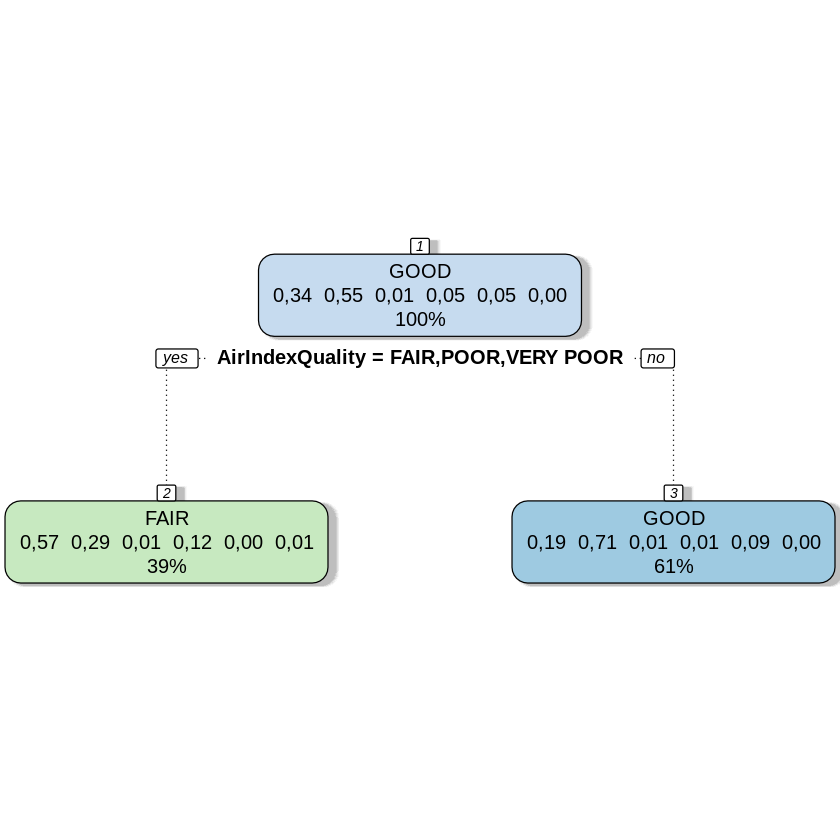

In [56]:
fancyRpartPlot(madrid_rpart, caption = NULL)

#### Predicción con los datos de test

Se añadirá una nueva columna, en esta columna se encontrará el valor predicho por el árbol de decisión

In [57]:
testData$AIQExpected <- predict(madrid_rpart, newdata = testData, type = "class")
head(testData)

,date,station,CO,NO_2,O_3,PM10,SO_2,worseAirIndex,AirIndexQuality,AIQNextDay,quantity,rainfallVolume,Speed,WindIndexQuality,AIQExpected
36101,2005-09-01,28079039,"0,7016667","72,20583","35,91696","11,42000","7,513750","72,20583",FAIR,FAIR,"0,0",WEAK,"1,1",LIGHT WIND,FAIR
36122,2005-09-02,28079039,"0,6775000","76,58500","43,05773","86,23957","8,038750","86,23957",FAIR,GOOD,"0,0",WEAK,"0,8",LIGHT WIND,FAIR
36150,2005-09-03,28079039,"0,5225000","48,17250","60,24391","44,47045","6,763333","60,24391",GOOD,FAIR,"0,0",WEAK,"1,7",LIGHT WIND,GOOD
36166,2005-09-04,28079039,"0,9395833","81,37125","33,38217","31,92412","8,664167","81,37125",FAIR,GOOD,"0,0",WEAK,"2,2",LIGHT WIND,FAIR
36187,2005-09-05,28079039,"0,6212500","39,21750","42,94913","48,32500","6,352500","48,32500",GOOD,GOOD,"0,0",WEAK,"3,3",LIGHT WIND,GOOD
36218,2005-09-06,28079039,"0,5654167","31,01583","45,98130","35,21783","6,028750","45,98130",GOOD,GOOD,"2,5",MODERATE,"3,1",LIGHT WIND,GOOD


In [58]:
predictTable<- table(testData$AIQExpected,testData$AIQNextDay)
predictTable

           
             FAIR  GOOD    NA  POOR VERY GOOD VERY POOR
  FAIR       6431  3544    69   577       123        10
  GOOD       3660 18814   522    64      7329        10
  NA            0     0     0     0         0         0
  POOR          0     0     0     0         0         0
  VERY GOOD     0     0     0     0         0         0
  VERY POOR     0     0     0     0         0         0

In [59]:
accuracy <- sum(diag(predictTable))/sum(predictTable)
accuracy

[1] 0,6134425

Observamos que obtenemos un nivel de confianza del 61 %, este es muy bajo por lo que se probará a utilizar otro modelo predictivo

### Regresión